# SUEZ UK REPORT

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta # importing all the necessary libraries

In [2]:
po = pd.read_csv('purchase orders.csv')
spend = pd.read_csv('spend.csv')
segm = pd.read_csv('segmentation.csv') # creating variables for accessing the csv files

### Following code creates an aggregate of different buyers and presents a breakdown of their orders

In [3]:
buyers_categories = segm['Buyers\' name'].value_counts() # Revealing counts of each buyer

<AxesSubplot:title={'center':'Buyers'}, ylabel="Buyers' count">

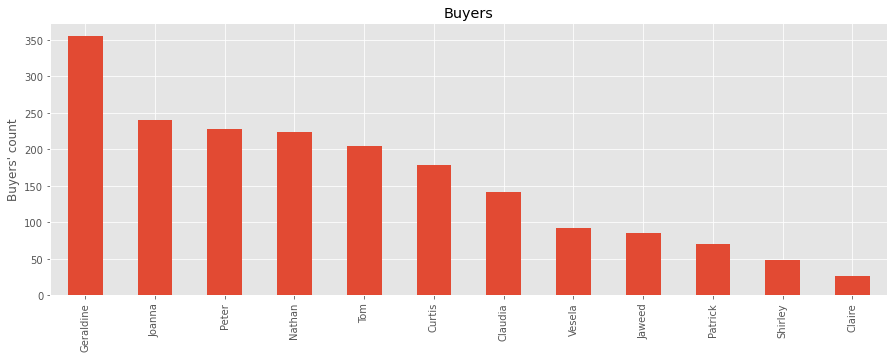

In [4]:
plt.style.use('ggplot') # setting up style
plt.rcParams['figure.figsize'] = (15, 5) # setting up chart size
buyers_categories.plot.bar(title='Buyers', ylabel='Buyers\' count') # displaying it on the bar chart

# Buyers' overview

### The Benefits of using the following for loop is that it one execution will print all the buyers' diagrams and it will work when the data is modified. These pie charts also give us a detailed overview of who the buyers are and what type of goods they require

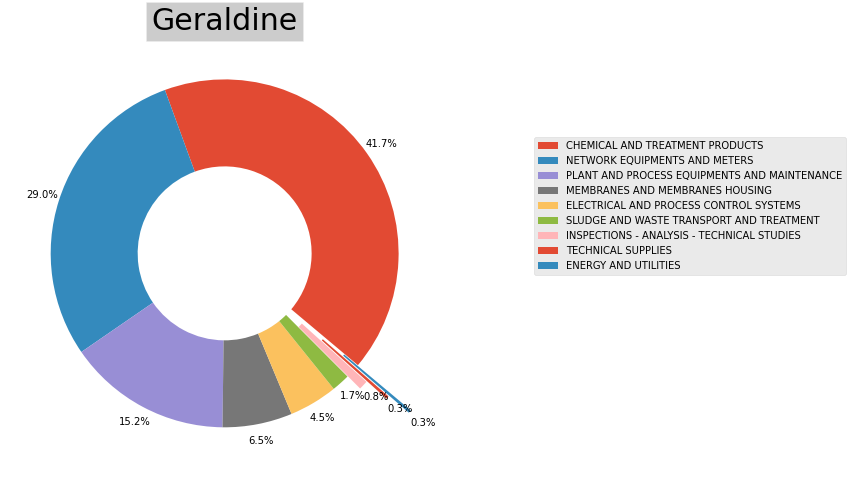

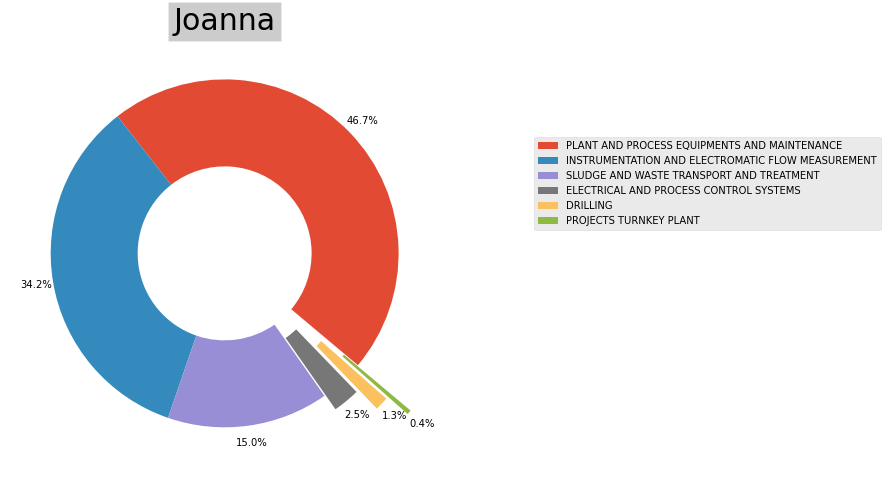

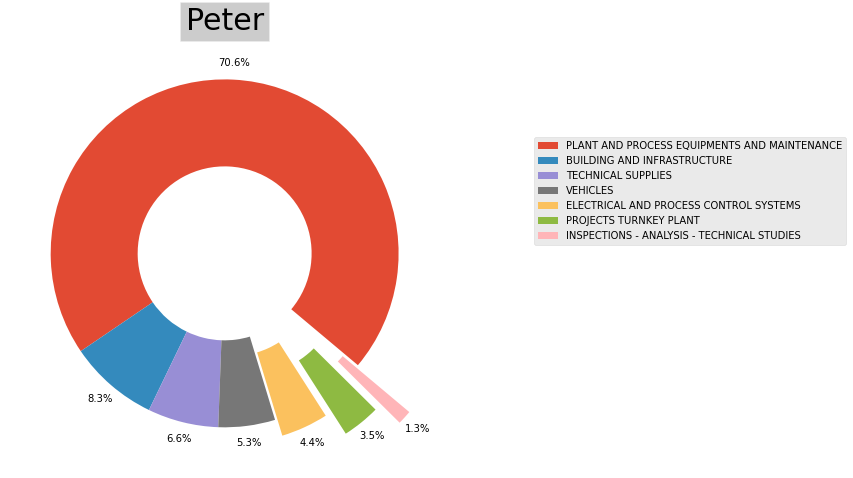

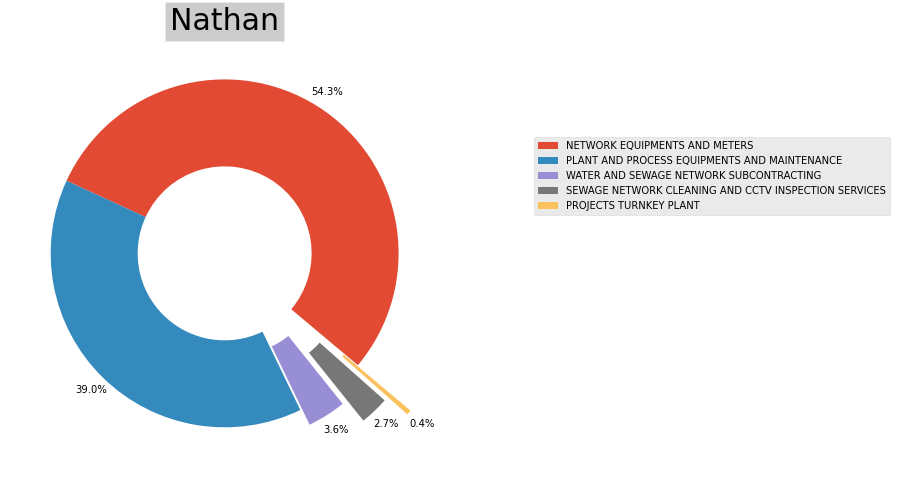

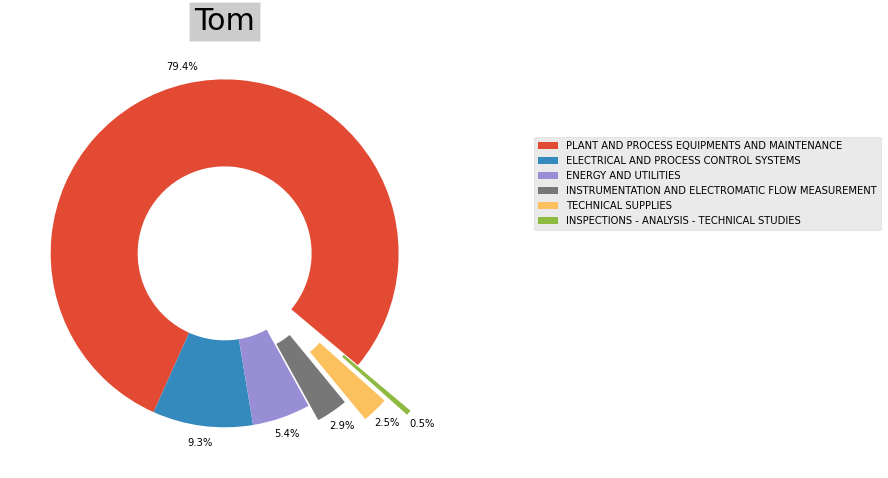

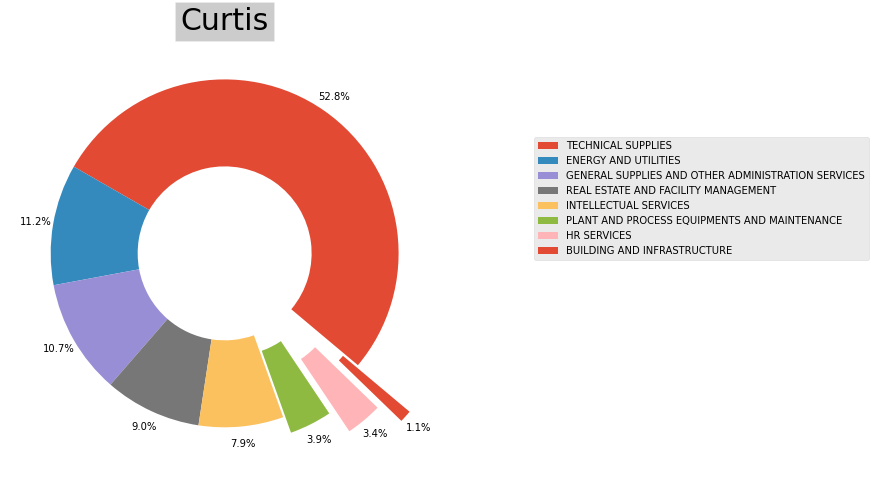

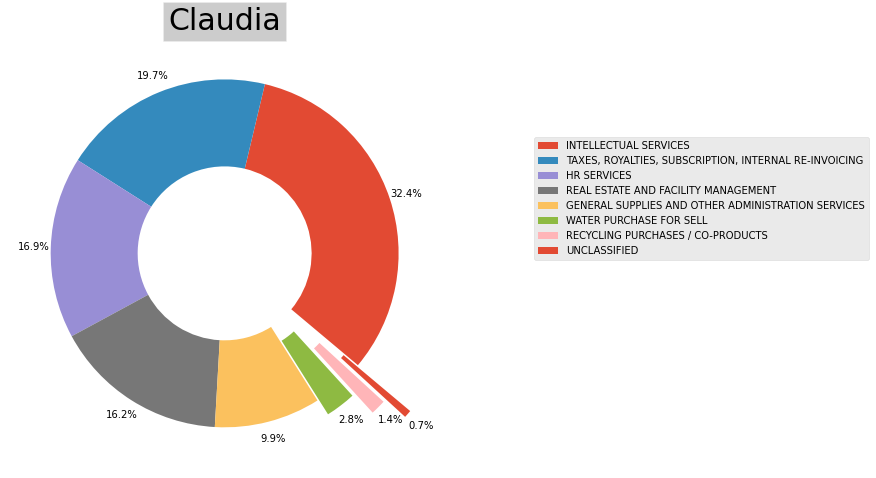

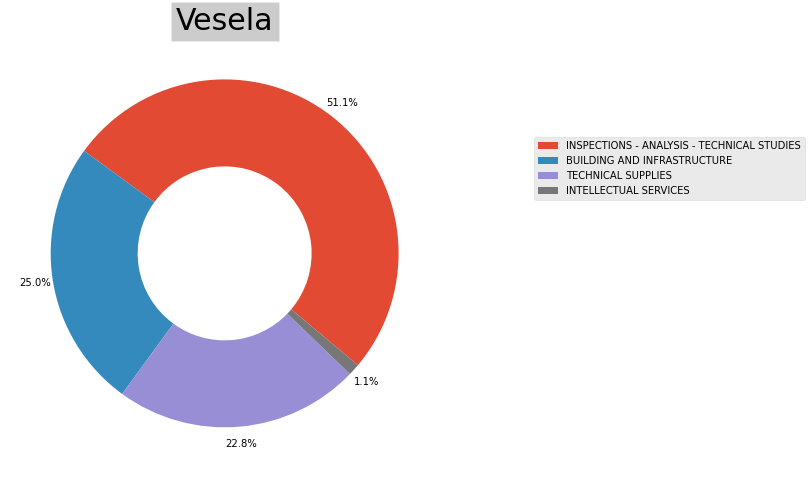

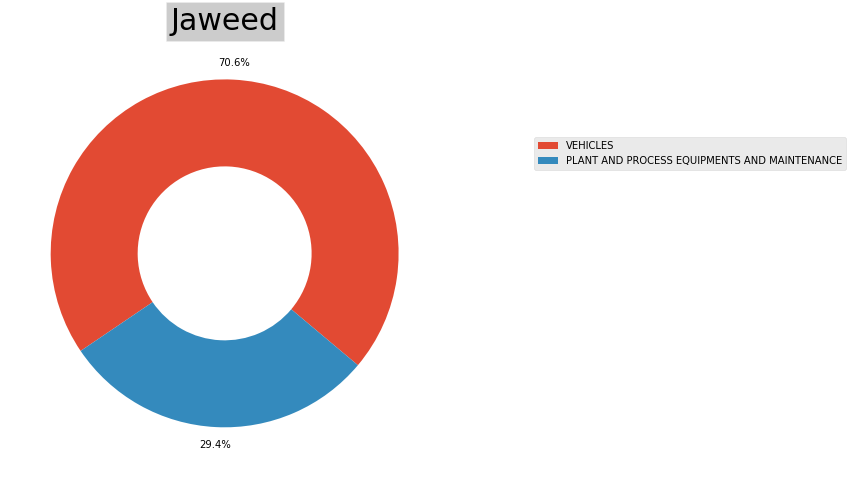

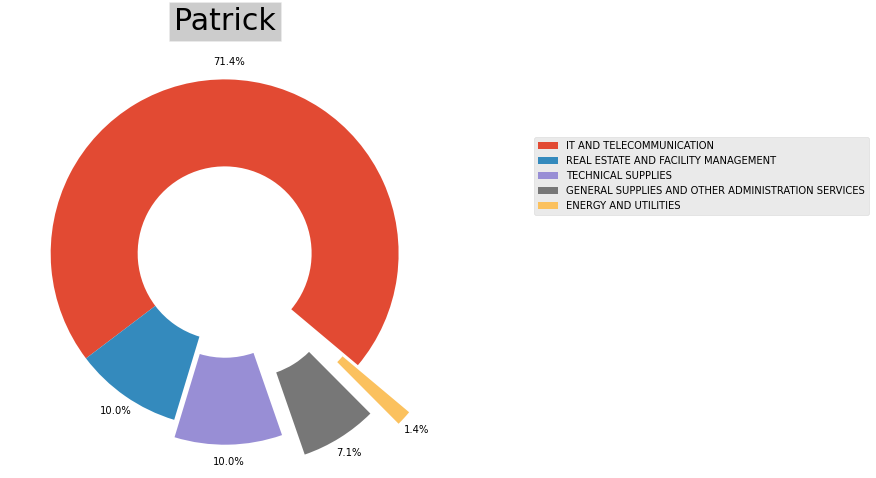

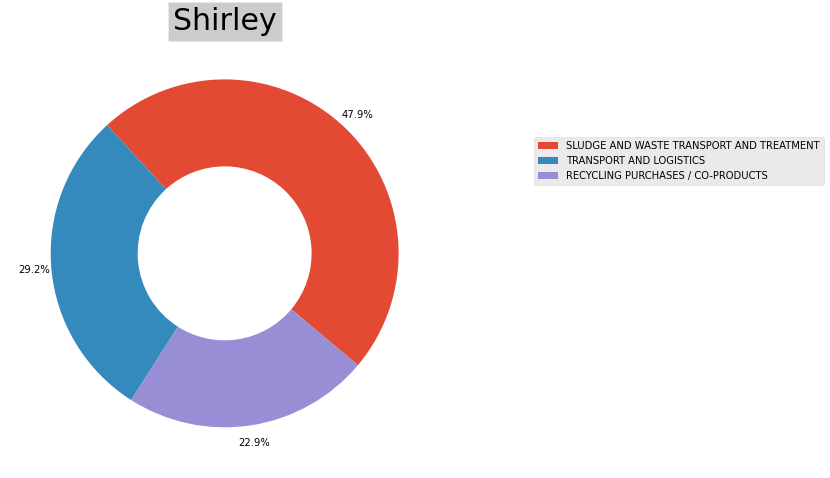

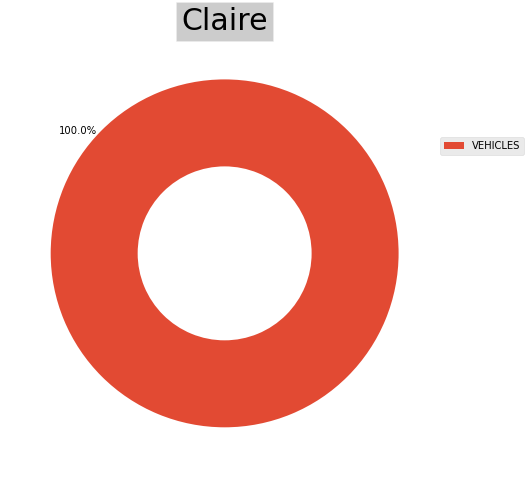

In [5]:
buyers_list = list(buyers_categories.keys()) # creating list of names

for i in buyers_list:                                           # for loop will print all of the names categorised
    grp_temp = segm.groupby('Buyers\' name').get_group(i)       # get group of one buyer
    grp_series = grp_temp['L1 seg.description'].value_counts()  # count have many categories that buyers consists of
    
    explode_list = []                                           # this will simply ensure that if pie chart has
    for j in range(len(grp_series)):                            # more that 5 pieces, it will start 'exploding'
        explode_list.append(0)                                  # Creates a better visual effect and prevents label
    if len(explode_list) >= 5:                                  # overlapping
        explode_list[-1], explode_list[-2], explode_list[-3] = 0.4, 0.25, 0.1
    
    plt.title(i, bbox={'facecolor': '0.8', 'pad': 5}, fontsize=30)
    plt.xticks([])
    grp_series.plot.pie(labeldistance=None, autopct='%1.1f%%', pctdistance=1.1,  figsize=(15, 8),  # some effect properties
                         wedgeprops=dict(width=0.5), startangle=-40, explode=explode_list)         # for the pie chart
    plt.ylabel(None)
    plt.legend(bbox_to_anchor=(1.2, 0.78))
    plt.show()

# Daily purchase timeline

### Based on the purchase orders spreadsheet we can present daily purchase order gross value during the period between 2018-01-01 and 2018-06-14

In [6]:
po['Purchase Order Gross Value'] = po['Purchase Order Gross Value'].str.replace(",", "").astype(float) # cleaning data

In [7]:
day_sales = po['Order Creation Date'].value_counts() # count how many invoices were sent on each date
day_sales_list = dict(day_sales)                     # cast it to list

In [8]:
data_dict = {}                       # this dictionary will contain all the dates as keys, and all the sums as values
for i in day_sales.keys():
    date_obj = datetime.strptime(i, '%Y-%m-%d')
    day_group_temp = po.groupby('Order Creation Date').get_group(i)
    if date_obj <= datetime(2018, 6, 15):
        data_dict[date_obj] = day_group_temp['Purchase Order Gross Value'].sum()

sdate = datetime(2018, 1, 1)   # start date
edate = datetime(2018, 6, 15)   # end date
delta = edate - sdate  

l = []                                 # we need this extra for loop because the dates from the dataset might have some days
for i in range(delta.days + 1):        # with gaps. we create a list here with all the dates before start and end and ...
    day = sdate + timedelta(days=i)
    l.append(day)

for dt in l:                           # ... here if that date was not present we create it and give it value of 0
    if dt not in data_dict:
        data_dict[dt] = 0

<BarContainer object of 166 artists>

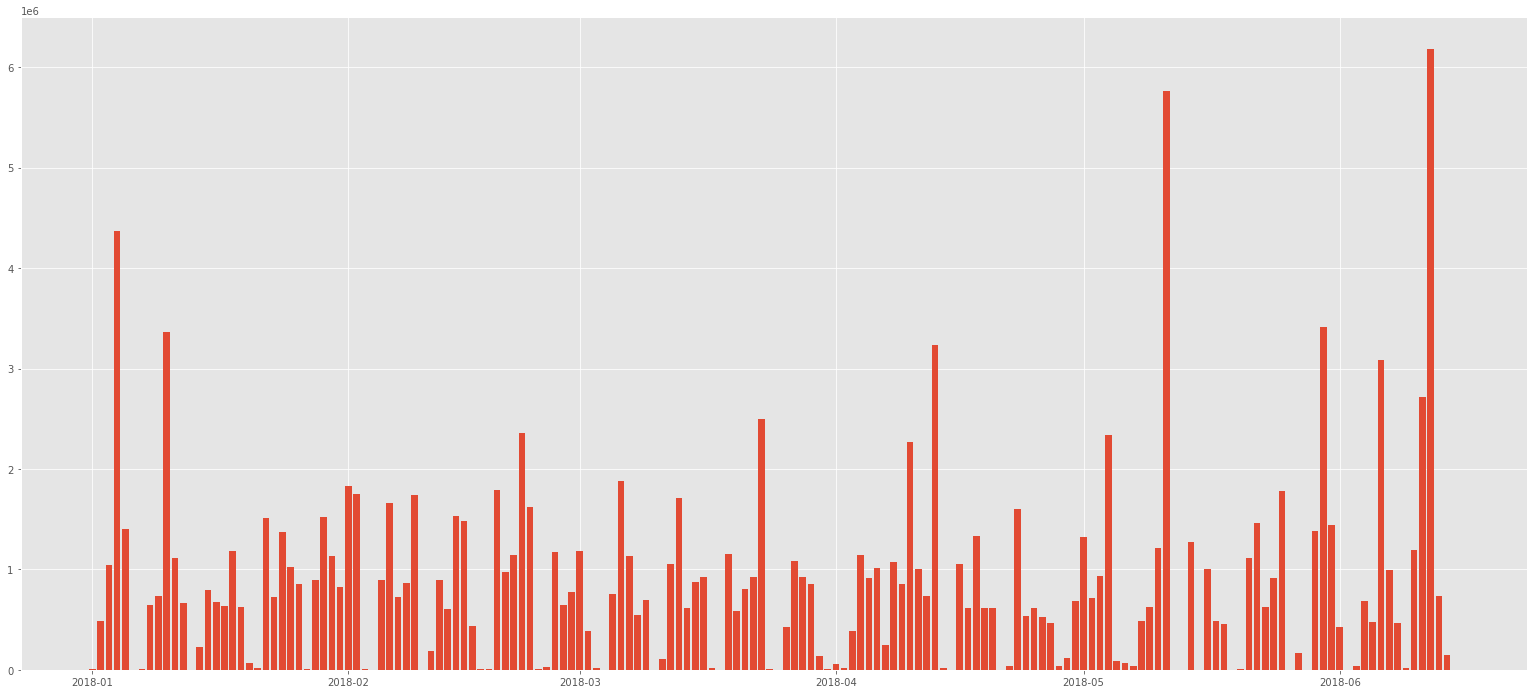

In [9]:
plt.rcParams['figure.figsize'] = (27, 12)
plt.bar(data_dict.keys(), data_dict.values())

### It is also interesting to see that some days of the week had more turnover than others

In [10]:
days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
weekday_dict = {}
for j in range(7):                          # this for loop will break down all of the days into 7 categories(days) and 
    sum_value = 0                           # give a sum of all the orders during that particular weekday throut
    for i in data_dict:                     # the period
        if i.weekday() == j:
            sum_value += data_dict[i]
    weekday_dict[days[j]] = sum_value

<AxesSubplot:>

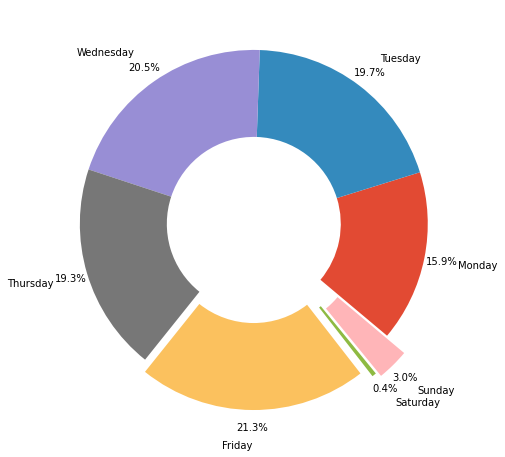

In [11]:
weekday_series = pd.Series(weekday_dict) 
weekday_series.plot.pie(labeldistance=1.2, autopct='%1.1f%%', pctdistance=1.1,  figsize=(15, 8), 
                         wedgeprops=dict(width=0.5), startangle=-40, explode=(0,0,0,0,0.07,0.11,0.14), ylabel = '')

### Numbers provided in the table below indicate that the vast majority of our suppliers are based in the UK.

In [12]:
country_count = spend['Country'].value_counts()
country_count.to_frame().transpose()

,GB,FR,DE,IE,NL,SE,BE,CA,IM,AT,DK,US,CH,NZ,IT,IN
Country,3391,14,9,6,5,2,2,1,1,1,1,1,1,1,1,1


### Pie chart below shows where our foreign suppliers are located

In [13]:
country_count = country_count.drop(labels=['GB'])

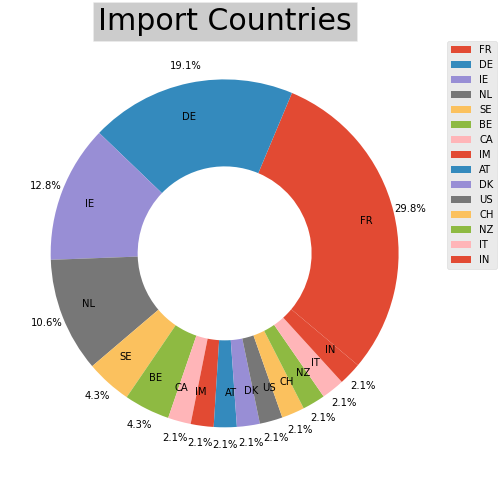

In [14]:
country_count.plot.pie(labeldistance=0.8, autopct='%1.1f%%', pctdistance=1.1,  figsize=(15, 8), 
                         wedgeprops=dict(width=0.5), startangle=-40)
plt.title('Import Countries', bbox={'facecolor':'0.8', 'pad':5}, fontsize=30)
plt.ylabel('')
plt.xticks([]) # rotation=9, size=8
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Table below provides top 10 suppliers we are spending the most

In [15]:
spend['Year To Date Spend'] = spend['Year To Date Spend'].str.replace(",", "").astype(float) # cleaning up data

In [16]:
total_spend_top_10 = spend.nlargest(10, 'Year To Date Spend') # Sorting 10 elemtents by the column
total_spend_top_10.loc[:, ['Supplier Name', 'Year To Date Spend']].style.hide_index() # selecting supplier name and year to date spend

Supplier Name,Year To Date Spend
Supplier 1253,7757160.100000
Supplier 2972,7757160.100000
Supplier 7,6268302.150000
Supplier 1726,6268302.150000
Supplier 1565,4806664.140000
Supplier 3284,4806664.140000
Supplier 90,4552138.240000
Supplier 1809,4552138.240000
Supplier 14,4551498.200000
Supplier 1733,4551498.200000


### Following data reveals that 16.5% of money spent went to only 10 suppliers, and more that half of the money went to top 50 suppliers (out of 3438 in total)

In [17]:
total_spend = spend['Year To Date Spend'].sum()
total_spend_top_10 = spend.nlargest(10, 'Year To Date Spend')
total_spend_top_50 = spend.nlargest(50, 'Year To Date Spend')
total_spend_top_10_sum = total_spend_top_10['Year To Date Spend'].sum()
total_spend_top_50_sum = total_spend_top_50['Year To Date Spend'].sum()

In [18]:
spend.shape # total suppliers

(3438, 11)

In [19]:
my_dict = {'TOP 10 SUPPLIERS SPEND':  total_spend_top_10_sum, 
           'THE REST': total_spend - total_spend_top_10_sum
          }

Text(0, 0.5, '')

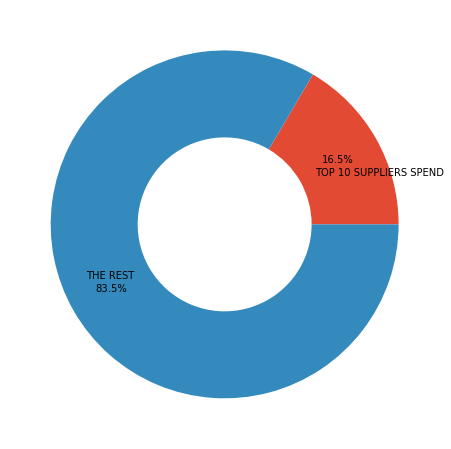

In [20]:
my_series1 = pd.Series(my_dict)
my_series1.plot.pie(labeldistance=0.6, autopct='%1.1f%%', pctdistance=0.75,  figsize=(15, 8), 
                         wedgeprops=dict(width=0.5))
plt.ylabel('')


In [21]:
my_dict2 = {'TOP 50 SUPPLIERS SPEND':  total_spend_top_50_sum, 
           'THE REST': total_spend - total_spend_top_50_sum
          }

Text(0, 0.5, '')

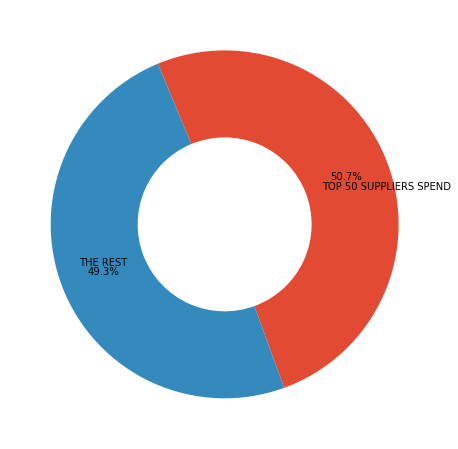

In [22]:
my_series2 = pd.Series(my_dict2)
my_series2.plot.pie(labeldistance=0.6, autopct='%1.1f%%', pctdistance=0.75,  figsize=(15, 8), 
                         wedgeprops=dict(width=0.5), startangle=-70)
plt.ylabel('')
